In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import pearsonr

# Hypothesis 1: The hike in the price of bread for developing countries is low as compared to underdeveloped countries.

### Read the food prices dataset

In [2]:
df = pd.read_csv("wfp_market_food_prices.csv")
df

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743909,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,156,Sesame,83,SSP,15,Retail,47,3.5 KG,5,2017,400.0,WFP
743910,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,2,2017,12.5,WFP
743911,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,3,2017,95.0,WFP
743912,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,2,2017,95.0,WFP


In [3]:
#Rename all the columns
food_data = df.rename(columns={"adm0_id": "country_id", "adm0_name": "country_name", "adm1_id": "locality_id", "adm1_name": "locality_name", "mkt_id": "market_id", "mkt_name": "market_name", "cm_id": "commodity_id", "cm_name": "commodity_name", "cur_id" : "currency_id", "cur_name" : "currency_name", "pt_id" : "market_type_id", "pt_name" : "market_type", "um_id": "measurement_id", "um_name" : "unit", "mp_month": "month", "mp_year": "year", "mp_price": "price", "mp_commoditysource" : "source_information"})
food_data

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodity_id,commodity_name,currency_id,currency_name,market_type_id,market_type,measurement_id,unit,month,year,price,source_information
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743909,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,156,Sesame,83,SSP,15,Retail,47,3.5 KG,5,2017,400.0,WFP
743910,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,2,2017,12.5,WFP
743911,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,3,2017,95.0,WFP
743912,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,2,2017,95.0,WFP


### Load the country data set

In [4]:
country_data = pd.read_excel("Country_status_price.xlsx")
country_data

,country_name,country_status,price_factor
0,Afghanistan,Developing,0.0100
1,Algeria,Developing,0.0072
2,Armenia,Developing,0.0021
3,Azerbaijan,Developing,0.5900
4,Bangladesh,Underdeveloped,0.0120
...,...,...,...
69,Zimbabwe,Developing,0.0270
70,State of Palestine,Developing,0.3200
71,Sudan,Underdeveloped,0.0023
72,Egypt,Developing,0.0640


In [5]:
#Merged the two datasets

combined_data = food_data.merge(country_data, left_on = 'country_name', right_on = 'country_name')

combined_data['usd_price'] = combined_data['price'] * combined_data['price_factor']

# combined_data["quarterly"] = combined_data.apply(lambda x: str(x['year']) + " Q1" if x['month'] >=1 and x['month'] < 4
#                                                  else str(x['year']) + " Q2" if x['month'] >= 4 and x['month'] < 7
#                                                  else str(x['year']) + " Q3" if x['month'] >= 7 and x['month'] < 10
#                                                  else str(x['year']) + " Q4", axis = 1)


# Add a 'quarterly' column which would determine the quarter of the year for that commodity and its market price

combined_data["quarterly"] = combined_data.apply(lambda x: "Q1" if x['month'] >=1 and x['month'] < 4
                                                 else "Q2" if x['month'] >= 4 and x['month'] < 7 
                                                 else "Q3" if x['month'] >= 7 and x['month'] < 10
                                                 else "Q4", axis = 1)
            

combined_data

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodity_id,commodity_name,currency_id,currency_name,...,measurement_id,unit,month,year,price,source_information,country_status,price_factor,usd_price,quarterly
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,1,2014,50.0,WFP,Developing,0.0100,0.50000,Q1
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,2,2014,50.0,WFP,Developing,0.0100,0.50000,Q1
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,3,2014,50.0,WFP,Developing,0.0100,0.50000,Q1
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,4,2014,50.0,WFP,Developing,0.0100,0.50000,Q2
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,5,2014,50.0,WFP,Developing,0.0100,0.50000,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743909,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,156,Sesame,83,SSP,...,47,3.5 KG,5,2017,400.0,WFP,Underdeveloped,0.0023,0.92000,Q2
743910,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,...,15,L,2,2017,12.5,WFP,Underdeveloped,0.0023,0.02875,Q1
743911,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,...,15,L,3,2017,95.0,WFP,Underdeveloped,0.0023,0.21850,Q1
743912,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,...,15,L,2,2017,95.0,WFP,Underdeveloped,0.0023,0.21850,Q1


In [6]:
#Check the data type of all the columns
combined_data.dtypes

country_id              int64
country_name           object
locality_id             int64
locality_name          object
market_id               int64
market_name            object
commodity_id            int64
commodity_name         object
currency_id             int64
currency_name          object
market_type_id          int64
market_type            object
measurement_id          int64
unit                   object
month                   int64
year                    int64
price                 float64
source_information     object
country_status         object
price_factor          float64
usd_price             float64
quarterly              object
dtype: object

In [7]:
# Create a separate list of developing and underdeveloped countries

country_data = combined_data[['country_name', 'country_status']].drop_duplicates()
devloping_country = country_data.loc[country_data['country_status'] == 'Developing', 'country_name'].tolist()
underdevloped_country = country_data.loc[country_data['country_status'] == 'Underdeveloped', 'country_name'].tolist()
#devloping_country, underdevloped_country

In [8]:
# Function to create a data set of 1 developing and 1 underdeveloped country

def select_data(country1, country2, commodity):
    selective_data = combined_data.loc[((combined_data.country_name == country1) | (combined_data.country_name == country2)) & (food_data.commodity_name == commodity)]
    return selective_data
select_data("Nigeria", "Afghanistan", "Bread")

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodity_id,commodity_name,currency_id,currency_name,...,measurement_id,unit,month,year,price,source_information,country_status,price_factor,usd_price,quarterly
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,1,2014,50.0000,WFP,Developing,0.0100,0.500000,Q1
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,2,2014,50.0000,WFP,Developing,0.0100,0.500000,Q1
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,3,2014,50.0000,WFP,Developing,0.0100,0.500000,Q1
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,4,2014,50.0000,WFP,Developing,0.0100,0.500000,Q2
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,KG,5,2014,50.0000,WFP,Developing,0.0100,0.500000,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442054,182,Nigeria,2224,Kaduna,1982,Saminaka,55,Bread,95,NGN,...,33,Unit,1,2017,264.7000,"FEWS NET, Nigeria",Underdeveloped,0.0024,0.635280,Q1
442055,182,Nigeria,2224,Kaduna,1982,Saminaka,55,Bread,95,NGN,...,33,Unit,2,2017,264.7069,"FEWS NET, Nigeria",Underdeveloped,0.0024,0.635297,Q1
442056,182,Nigeria,2224,Kaduna,1982,Saminaka,55,Bread,95,NGN,...,33,Unit,3,2017,264.0000,FEWSNET,Underdeveloped,0.0024,0.633600,Q1
442057,182,Nigeria,2224,Kaduna,1982,Saminaka,55,Bread,95,NGN,...,33,Unit,4,2017,264.0000,FEWS NET,Underdeveloped,0.0024,0.633600,Q2


In [9]:
# Function to calculate the difference between consecutive USD price of a commodity

def calc_diff(group: pd.DataFrame):
    group['usd_chng'] = group.usd_price.diff(1)
    return group

In [10]:
# Function to plot a line graph based on the quarterly price of a commodity within two countries

def plot_data(_data: pd.DataFrame):
    new_data = subset_data[['quarterly', 'usd_price', 'country_name']].drop_duplicates()
    t = new_data.groupby('country_name').apply(lambda x: calc_diff(x))
    ax = sns.lineplot(data = t, x = "quarterly", y = "usd_chng", ci = None, hue = "country_name", sort = False)
    ax.set_xlim(q1, q2)
    ax.set_xlabel("Year-Quarter")
    ax.set_ylabel("Price")
    sns.set(rc = {'figure.figsize':(10,8)})
    plt.show()

In [11]:
# Function to calculate the correlation coefficient between two countries

def calc_corr(_data: pd.DataFrame, country1, country2):
    corr_value = pearsonr(_data.loc[_data['country_name']== country1, 'usd_price'].tolist(), _data.loc[_data['country_name']== country2, 'usd_price'].tolist())
#     corr_value =  _data.loc[_data['country_name']== country1, 'usd_price'].corr(_data.loc[_data['country_name']==country2, 'usd_price'])
#     print(type(corr_value))
    return corr_value

    
    
    

In [12]:
dict_ = {'c1':[], 'c2':[], 'comm': [], 'score':[]}
# subset_data = None
for country1 in devloping_country:
    for country2 in underdevloped_country:
        subset_data = select_data(country1, country2, 'Bread') 
        if subset_data.country_name.nunique() == 2:
#             if subset_data.shape[0]>0:
#                 continue

            q1, q2 = subset_data[subset_data['year']==subset_data.groupby(subset_data['country_name'])['year'].min().max()]['quarterly'].max(), subset_data[subset_data['year']==subset_data.groupby(subset_data['country_name'])['year'].max().min()]['quarterly'].min()
            print(country1, country2, q1, q2)
#             print((subset_data.groupby(subset_data['country_name'])['year'].max()).min())


#             print(country1, country2, calc_corr(subset_data, country1, country2))


#             corr_score = plot_data(subset_data)
#             dict_['c1'].append(country1)
#             dict_['c2'].append(country2)
#             dict_['comm'].append("Bread")
#             dict_['score'].append(corr_score)

        
        

Afghanistan Congo Q4 Q1
Afghanistan Djibouti Q4 Q1
Afghanistan Gambia Q4 Q1
Afghanistan Guinea Q4 Q1
Afghanistan Kyrgyzstan Q4 Q1
Afghanistan Nigeria Q4 Q1
Algeria Congo Q4 Q1
Algeria Djibouti Q4 Q1
Algeria Gambia Q4 Q1
Algeria Guinea Q4 Q1
Algeria Kyrgyzstan Q4 Q1
Algeria Nigeria Q4 Q1
Guatemala Congo Q4 Q1
Guatemala Djibouti Q4 Q1
Guatemala Gambia Q4 Q1
Guatemala Guinea Q4 Q1
Guatemala Kyrgyzstan Q4 Q1
Guatemala Nigeria Q4 Q1
Kenya Congo Q4 Q1
Kenya Djibouti Q4 Q1
Kenya Gambia Q4 Q1
Kenya Guinea Q4 Q1
Kenya Kyrgyzstan Q4 Q1
Kenya Nigeria Q4 Q1
Tajikistan Congo Q4 Q1
Tajikistan Djibouti Q4 Q1
Tajikistan Gambia Q4 Q1
Tajikistan Guinea Q4 Q1
Tajikistan Kyrgyzstan Q4 Q1
Tajikistan Nigeria Q4 Q1
State of Palestine Congo Q4 Q1
State of Palestine Djibouti Q4 Q1
State of Palestine Gambia Q4 Q1
State of Palestine Guinea Q4 Q1
State of Palestine Kyrgyzstan Q4 Q1
State of Palestine Nigeria Q4 Q1


# Hypothesis 2: The occurrence of a natural disaster such as storm has effect over the rise in food prices.

In [13]:
crop_data = pd.read_csv("FAOSTAT_data_11-29-2021.csv",
                        usecols = ['Domain','Area Code (FAO)','Area','Element','Item Code',
                                   'Item','Year','Months','Unit','Value'])

In [14]:
crop_data.head()

,Domain,Area Code (FAO),Area,Element,Item Code,Item,Year,Months,Unit,Value
0,Producer Prices,231,United States of America,Producer Price (LCU/tonne),15,Wheat,2010,January,LCU,180
1,Producer Prices,231,United States of America,Producer Price (LCU/tonne),15,Wheat,2010,February,LCU,174
2,Producer Prices,231,United States of America,Producer Price (LCU/tonne),15,Wheat,2010,March,LCU,173
3,Producer Prices,231,United States of America,Producer Price (LCU/tonne),15,Wheat,2010,April,LCU,162
4,Producer Prices,231,United States of America,Producer Price (LCU/tonne),15,Wheat,2010,May,LCU,159


In [15]:
crop_data1 = crop_data[['Year','Months']]
crop_data1.head()

,Year,Months
0,2010,January
1,2010,February
2,2010,March
3,2010,April
4,2010,May


In [16]:
storm_df = pd.DataFrame()
for i in range(19,10, -1):
    storm_df = storm_df.append( pd.read_csv(f'StormEvents_details-ftp_v1.0_d20{i}.csv') )
    
storm_df = storm_df[['BEGIN_YEARMONTH','BEGIN_DAY','BEGIN_TIME','END_YEARMONTH','END_DAY','END_TIME', 
                     'EPISODE_ID','EVENT_ID','STATE','YEAR','MONTH_NAME','EVENT_TYPE','DAMAGE_PROPERTY',
                     'DAMAGE_CROPS','MAGNITUDE']]

storm_df = storm_df[storm_df['MAGNITUDE'] >= 96]

In [17]:
storm_df.tail()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE
71805,201108,3,2318,201108,3,2325,53492,346842,ALABAMA,2011,August,Thunderstorm Wind,150.00K,0.00K,96.0
72352,201108,9,1915,201108,9,1916,56834,340504,OKLAHOMA,2011,August,Thunderstorm Wind,1.50M,0.00K,109.0
72778,201111,15,1940,201111,17,1240,58305,349709,ALASKA,2011,November,High Wind,15.00K,0.00K,102.0
73735,201105,24,1518,201105,24,1522,52830,316943,OKLAHOMA,2011,May,Thunderstorm Wind,NaN,NaN,131.0
77941,201108,1,555,201108,1,625,53225,318321,MINNESOTA,2011,August,Thunderstorm Wind,1.00M,0.00K,104.0


In [18]:
storm_df_short = storm_df[['YEAR', 'MONTH_NAME']]
storm_df_short

,YEAR,MONTH_NAME
1439,2019,January
1440,2019,January
1519,2019,January
1643,2019,January
1644,2019,January
...,...,...
71805,2011,August
72352,2011,August
72778,2011,November
73735,2011,May


In [19]:
storm_df_grouped = storm_df_short.groupby('YEAR')['MONTH_NAME'].value_counts().reset_index(name='count_storm')
# storm_df = storm_df.to_frame
storm_df_grouped

,YEAR,MONTH_NAME,count_storm
0,2011,July,20
1,2011,December,7
2,2011,April,6
3,2011,March,4
4,2011,November,4
...,...,...,...
68,2019,November,3
69,2019,December,2
70,2019,February,2
71,2019,July,1


In [20]:
crop_df = crop_data[['Year','Months','Value']]
crop_df

,Year,Months,Value
0,2010,January,180
1,2010,February,174
2,2010,March,173
3,2010,April,162
4,2010,May,159
...,...,...,...
104,2019,August,160
105,2019,September,157
106,2019,October,164
107,2019,November,161


In [21]:
result_df = crop_df.merge(storm_df_grouped, how='inner', 
                          left_on = ['Year','Months'], right_on = ['YEAR','MONTH_NAME'])

In [22]:
def get_date(row):
    date = str(row[0]) + " " + str(row[1])
    return datetime.strptime(date,'%Y %B')

result_df['Date'] = result_df.apply(lambda x: get_date(x), axis=1)

In [23]:
result_df = result_df.drop(['Year','Months'],axis=1)

In [24]:
result_df = result_df.sort_values('Date')
result_df

,Value,YEAR,MONTH_NAME,count_storm,Date
0,273,2011,February,2,2011-02-01
1,277,2011,March,4,2011-03-01
2,294,2011,April,6,2011-04-01
3,300,2011,May,1,2011-05-01
4,272,2011,June,3,2011-06-01
...,...,...,...,...,...
59,177,2019,June,3,2019-06-01
60,166,2019,July,1,2019-07-01
61,164,2019,October,1,2019-10-01
62,161,2019,November,3,2019-11-01


In [25]:
result_df['Price_shift'] = result_df['Value'].shift(1)

In [26]:
result_df['Value - Price_shift'] = result_df['Value'] - result_df['Price_shift']
result_df.head(12)

,Value,YEAR,MONTH_NAME,count_storm,Date,Price_shift,Value - Price_shift
0,273,2011,February,2,2011-02-01,NaN,NaN
1,277,2011,March,4,2011-03-01,273.0,4.0
2,294,2011,April,6,2011-04-01,277.0,17.0
3,300,2011,May,1,2011-05-01,294.0,6.0
4,272,2011,June,3,2011-06-01,300.0,-28.0
5,261,2011,July,20,2011-07-01,272.0,-11.0
6,279,2011,August,3,2011-08-01,261.0,18.0
7,277,2011,September,3,2011-09-01,279.0,-2.0
8,267,2011,October,1,2011-10-01,277.0,-10.0
9,268,2011,November,4,2011-11-01,267.0,1.0


In [27]:
result_df['count_storm'] = result_df['count_storm'].astype('int32')
result_df['Value'] = result_df['Value'].astype('int32')

In [28]:
#Normalizing the values
result_df['count_storm'] = (result_df['count_storm'] - result_df['count_storm'].min() )/ (result_df['count_storm'].max() - result_df['count_storm'].min())
result_df['Value - Price_shift'] = (result_df['Value - Price_shift'] - result_df['Value - Price_shift'].min() )/ (result_df['Value - Price_shift'].max() - result_df['Value - Price_shift'].min())


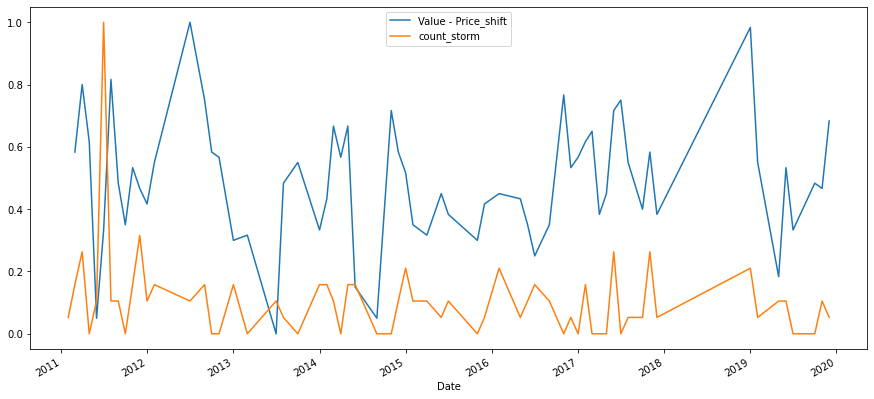

In [29]:
result_df.plot(x="Date", y=["Value - Price_shift","count_storm"], kind="line",figsize=(15,7))
plt.show()

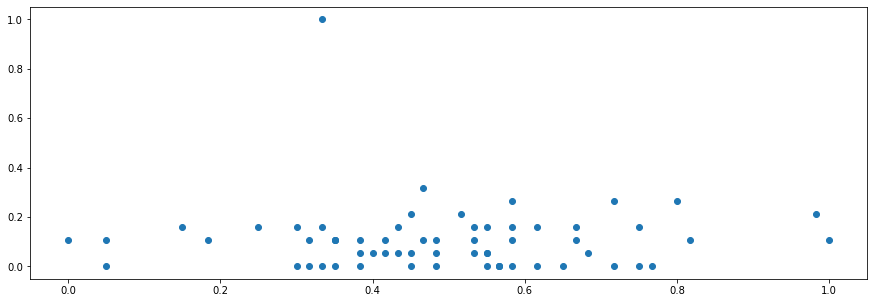

In [30]:
plt.figure(figsize=(15,5))
plt.scatter(result_df['Value - Price_shift'], result_df['count_storm'])

In [31]:
#Calulated the pearsonr value to find the correlation and P value
pearsonr(result_df['Value'], result_df['count_storm'])

(0.1636921494410647, 0.19619611335990467)

##### As the P value is greater than 0.05 and the correlation is close to 0 so we can say that, we fail to prove that storm prices have significant effect on the food crops.
## Therefore, we reject our Hypothesis